In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('BBDD.xlsx')

# Multiclases

In [3]:
df = pd.read_csv('Twitter_Data2.csv')

In [4]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

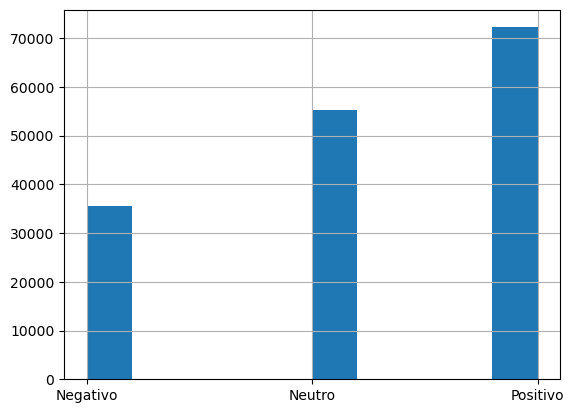

In [5]:
df['category'].hist()

In [6]:
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [7]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [8]:
df_train, df_test = train_test_split(df)

In [9]:
df_train.head()

,clean_text,category,target
162752,kya back sucking,Neutro,2
75776,really respect you and your intellect ktr garu...,Positivo,1
111357,only way snubbing amit and modi would not elec...,Neutro,2
111388,warns modi ban pellet gun indian occupied kash...,Neutro,2
83825,does modi has learn how connect with people re...,Positivo,1


In [10]:
df_train

,clean_text,category,target
162752,kya back sucking,Neutro,2
75776,really respect you and your intellect ktr garu...,Positivo,1
111357,only way snubbing amit and modi would not elec...,Neutro,2
111388,warns modi ban pellet gun indian occupied kash...,Neutro,2
83825,does modi has learn how connect with people re...,Positivo,1
...,...,...,...
92194,you interview people who attended modi rally w...,Positivo,1
113246,was modi last years diplomacy brought our brav...,Positivo,1
3879,modi has never used derogatery language agains...,Neutro,2
82490,wonder that modi goes around hugging everybody,Neutro,2


In [11]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1766113 stored elements in Compressed Sparse Row format>

In [12]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 586311 stored elements in Compressed Sparse Row format>

In [13]:
Y_train = df_train['target']
Y_test = df_test['target']

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8947523440184576
Test acc: 0.8891070639634775


In [15]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
P_train

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [16]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75707715, 0.12164841, 0.12127445],
       [0.03741905, 0.89951473, 0.06306622],
       [0.00852548, 0.01380546, 0.97766906]])

In [17]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

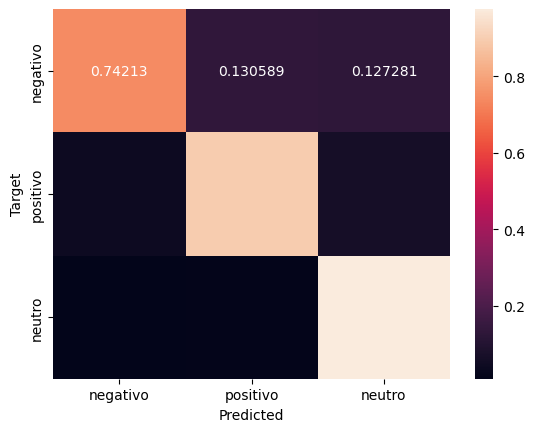

In [18]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)